# Critical Points and Optimization
We've explored various techniques that we can use to calculate the derivative of a function at a specific *x* value; in other words, we can determine the *slope* of the line created by the function at any point on the line.

This ability to calculate the slope means that we can use derivatives to determine some interesting properties of the function.

## Function Direction at a Point
Consider the following function, which represents the trajectory of a ball that has been kicked on a football field:

\begin{equation}k(x) = -10x^{2} + 100x + 3 \end{equation}

Run the R code below to graph this function and see the trajectory of the ball over a period of 10 seconds.

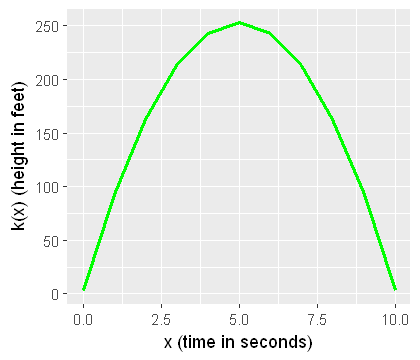

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions

## Define the function
k = function(x) -10 * x^2 + 100 * x + 3

df1 = data.frame(x = seq(0,10))
df1$f = k(df1$x)

ggplot(df1, aes(x,f)) +
    geom_line(color = 'green', size = 1) +
    ylab('k(x) (height in feet)') + 
    xlab('x (time in seconds)')

By looking at the graph of this function, you can see that it describes a parabola in which the ball rose in height before falling back to the ground. On the graph, it's fairly easy to see when the ball was rising and when it was falling.

Of course, we can also use  derivative to determine the slope of the function at any point. We can apply some of the rules we've discussed previously to determine the derivative function:

- We can add together the derivatives of the individual terms (***-10x<sup>2</sup>***, ***100x***, and ***3***) to find the derivative of the entire function.
- The *power* rule tells us that the derivative of ***-10x<sup>2</sup>*** is ***-10 &bull; 2x***, which is ***-20x***.
- The *power* rule also tells us that the derivative of ***100x*** is ***100***.
- The derivative of any constant, such as ***3*** is ***0***.

So:

\begin{equation}k'(x) = -20x + 100 + 0 \end{equation}

Which of course simplifies to:

\begin{equation}k'(x) = -20x + 100 \end{equation}

Now we can use this derivative function to find the slope for any value of ***x***.

Run the cell below to see a graph of the function and its derivative function:

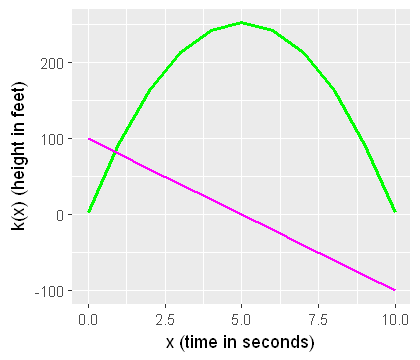

In [2]:
## Function to compute derivative
kd = function(x) -20 * x + 100

df2 = data.frame(x = seq(0,10))
df2$y = kd(df2$x)

ggplot() +
    geom_line(data = df1, aes(x,f), color = 'green', size = 1) +
    geom_line(data = df2, aes(x,y), color = 'magenta', size = 0.8) +
    ylab('k(x) (height in feet)') + 
    xlab('x (time in seconds)')

Look closely at the purple line representing the derivative function, and note that it is a constant  decreasing value - in other words, the slope of the function is reducing linearly as x increases. Even though the function value itself is increasing for the first half of the parabola (while the ball is rising), the slope is becoming less steep (the ball is not rising at such a high rate), until finally the ball reaches its apogee and the slope becomes negative (the ball begins falling).

Note also that the point where the derivative line crosses 0 on the y-axis is also the point where the function value stops increasing and starts decreasing. When the slope has a positive value, the function is increasing; and when the slope has a negative value, the function is decreasing.

The fact that the derivative line crosses 0 at the highest point of the function makes sense if you think about it logically. If you were to draw the tangent line representing the slope at each point, it would be rotating clockwise throughout the graph, initially pointing up and to the right as the ball rises, and turning until it is pointing down and right as the ball falls. At the highest point, the tangent line would be perfectly horizontal, representing a slope of 0.

Run the following code to visualize this:

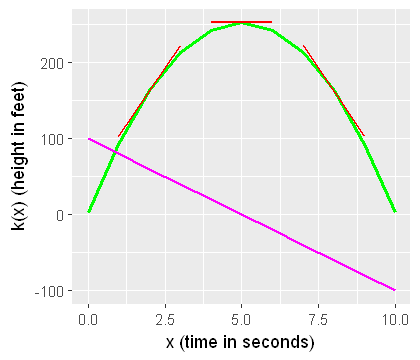

In [3]:
# Tangent points to plot
x1 = 2
x2 = 5
x3 = 8

ggplot() +
    geom_line(data = df1, aes(x,f), color = 'green', size = 1) +
    geom_line(data = df2, aes(x,y), color = 'magenta', size = 0.8) +
    geom_line(data = data.frame(x = c(x1-1,x1+1), y = c(k(x1)-kd(x1),k(x1)+kd(x1))), 
                                aes(x,y), color = 'red', size = 0.8) +
    geom_line(data = data.frame(x = c(x2-1,x2+1), y = c(k(x2)-kd(x2),k(x2)+kd(x2))), 
                                aes(x,y), color = 'red', size = 0.8) +
    geom_line(data = data.frame(x = c(x3-1,x3+1), y = c(k(x3)-kd(x3),k(x3)+kd(x3))), 
                                aes(x,y), color = 'red', size = 0.8) +
    ylab('k(x) (height in feet)') + 
    xlab('x (time in seconds)')

Now consider the following function, which represents the number of flowers growing in a flower bed before and after the spraying of a fertilizer:

\begin{equation}w(x) = x^{2} + 2x + 7 \end{equation}

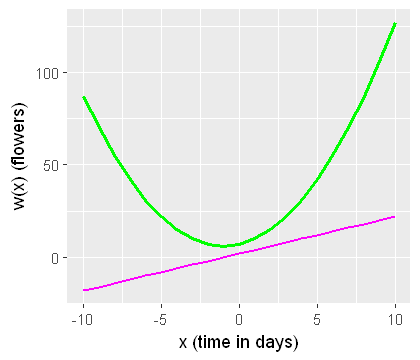

In [4]:
## Define the function
w = function(x) x^2 + 2 * x + 7

df3 = data.frame(x = seq(-10,10))
df3$w = w(df3$x)

## Function to compute derivative
wd = function(x) 2 * x + 2

df4 = data.frame(x = seq(-10,10))
df4$y = wd(df4$x)

ggplot() +
    geom_line(data = df3, aes(x,w), color = 'green', size = 1) +
    geom_line(data = df4, aes(x,y), color = 'magenta', size = 0.8) +
    ylab('w(x) (flowers)') + 
    xlab('x (time in days)')

Note that the green line represents the function, showing the number of flowers for 10 days before and after the fertilizer treatment. Before treatment, the number of flowers was in decline, and after treatment the flower bed started to recover.

The derivative function is shown in purple, and once again shows a linear change in slope. This time, the slope is increasing at a constant rate; and once again, the derivative function line crosses 0 at the lowest point in the function line (in other words, the slope changed from negative to positive when the flowers started to recover).

## Critical Points
From what we've seen so far, it seems that there is a relationship between a function reaching an extreme value (a maximum or a minimum), and a derivative value of 0. This makes intuitive sense; the derivative represents the slope of the line, so when a function changes from a negative slope to a positive slope, or vice-versa, the derivative must pass through 0.

However, you need to be careful not to assume that just because the derivative is 0 at a given point, that this point represents the minimum or maximum of the function. For example, consider the following function:

\begin{equation}v(x) = x^{3} - 2x + 100 \end{equation}

Run the following R code to visualize this function and its corresponding derivative function:

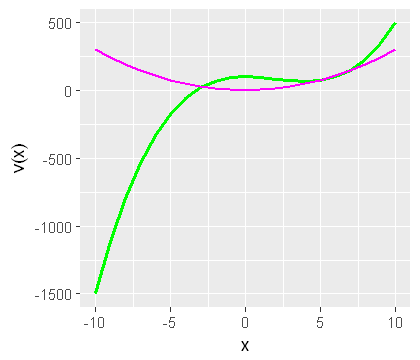

In [5]:
## Define the function
v = function(x) x^3 -6 * x^2 + 100

df5 = data.frame(x = seq(-10,10))
df5$v = v(df5$x)

## Function to compute derivative
vd = function(x) 3 * x^2 + 2

df6 = data.frame(x = seq(-10,10))
df6$y = vd(df6$x)

ggplot() +
    geom_line(data = df5, aes(x,v), color = 'green', size = 1) +
    geom_line(data = df6, aes(x,y), color = 'magenta', size = 0.8) +
    ylab('v(x)') + 
    xlab('x')

Note that in this case, the purple derivative function line passes through 0 as the green function line transitions from a *concave downwards* slope (a slope that is decreasing) to a *concave upwards* slope (a slope that is increasing). The slope flattens out to 0, forming a "saddle" before the it starts increasing.

What we can learn from this is that interesting things seem to happen to the function when the derivative is 0. We call points where the derivative crosses 0 *critical points*, because they indicate that the function is changing direction. When a function changes direction from positive to negative, it forms a peak (or a *local maximum*), when the function changes direction from negative to positive it forms a trough (or *local minimum*), and when it maintains the same overall direction but changes the concavity of the slope it creates an *inflexion point*.

## Finding Minima and Maxima
A common use of calculus is to find minimum and maximum points in a function. For example, we might want to find out how many seconds it took for the kicked football to reach its maximum height, or how long it took for our fertilizer to be effective in reversing the decline of flower growth.

We've seen that when a function changes direction to create a maximum peak or a minimum trough, the derivative of the function is 0, so a step towards finding these extreme points might be to simply find all of the points in the function where the derivative is 0. For example, here's our function for the kicked football:

\begin{equation}k(x) = -10x^{2} + 100x + 3 \end{equation}

From this, we've calculated the function for the derivative as:

\begin{equation}k'(x) = -20x + 100 \end{equation}

We can then solve the derivative equation for an f'(x) value of 0:

\begin{equation}-20x + 100 = 0 \end{equation}

We can remove the constant by subtracting 100 to both sides:

\begin{equation}-20x = -100 \end{equation}

Multiplying both sides by -1 gets rid of the negative values (this isn't strictly necessary, but makes the equation a little less confusing)

\begin{equation}20x = 100 \end{equation}

So:

\begin{equation}x = 5 \end{equation}

So we know that the derivative will be 0 when *x* is 5, but is this a minimum, a maximum, or neither? It could just be an inflexion point, or the entire function could be a constant value with a slope of 0) Without looking at the graph, it's difficult to tell.

## Second Order Derivatives
The solution to our problem is to find the derivative of the derivative! Until now, we've found the derivative of a function, and indicated it as ***f'(x)***. Technically, this is known as the *prime* derivative; and it describes the slope of the function. Since the derivative function is itself a function, we can find its derivative, which we call the *second order* (or sometimes just *second*) derivative. This is indicated like this: ***f''(x)***.

So, here's our function for the kicked football:

\begin{equation}k(x) = -10x^{2} + 100x + 3 \end{equation}

Here's the function for the prime derivative:

\begin{equation}k'(x) = -20x + 100 \end{equation}

And using a combination of the power rule and the constant rule, here's the function for the second derivative:

\begin{equation}k''(x) = -20 \end{equation}

Now, without even drawing the graph, we can see that the second derivative has a constant value; so we know that the slope of the prime derivative is linear; and because it's a negative value, we know that it is decreasing. So when the prime derivative crosses 0, it we know that the slope of the function is decreasing linearly; so the point at *x=0* must be a maximum point.

Run the following code to plot the function, the prime derivative, and the second derivative for the kicked ball:

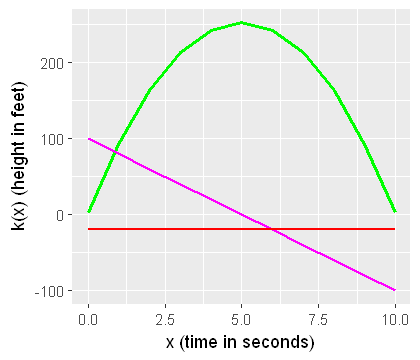

In [6]:
## The second derivative
df2$sec_der = rep(-20, length.out = nrow(df2)) 

ggplot() +
    geom_line(data = df1, aes(x,f), color = 'green', size = 1) +
    geom_line(data = df2, aes(x,y), color = 'magenta', size = 0.8) +
    geom_line(data = df2, aes(x,sec_der), color = 'red', size = 0.8) +
    ylab('k(x) (height in feet)') + 
    xlab('x (time in seconds)')

Let's take the same approach for the flower bed problem. Here's the function:

\begin{equation}w(x) = x^{2} + 2x + 7 \end{equation}

Using the power rule and constant rule, gives us the prime derivative function:

\begin{equation}w'(x) = 2x + 2 \end{equation}

Applying the power rule and constant rule to the prime derivative function gives us the second derivative function:

\begin{equation}w''(x) = 2 \end{equation}

Note that this time, the second derivative is a positive constant, so the prime derivative (which is the slope of the function) is increasing linearly. The point where the prime derivative crosses 0 must therefore be a minimum. Let's run the code below to check:

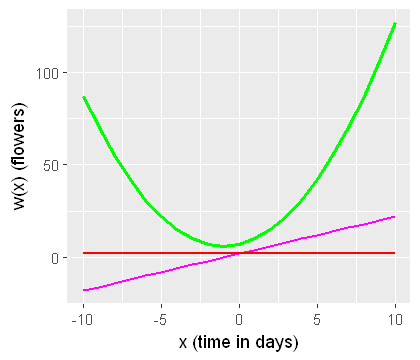

In [7]:
## The second derivative
df4$sec_der = rep(2, length.out = nrow(df4)) 

ggplot() +
    geom_line(data = df3, aes(x,w), color = 'green', size = 1) +
    geom_line(data = df4, aes(x,y), color = 'magenta', size = 0.8) +
    geom_line(data = df4, aes(x,sec_der), color = 'red', size = 0.8) +
    ylab('w(x) (flowers)') + 
    xlab('x (time in days)')

## Critical Points that are *Not* Maxima or Minima
Of course, it's possible for a function to form a "saddle" where the prime derivative is zero at a point that is not a minimum or maximum. Here's an example of a function like this:
 
\begin{equation}v(x) = x^{3} - 6x^{2} + 12x + 2 \end{equation}

And here's its prime derivative:
 
\begin{equation}v'(x) = 3x^{2} - 12x + 12 \end{equation}
 
Let's find a critical point where v'(x) = 0
 
\begin{equation}3x^{2} - 12x + 12 = 0 \end{equation}

Factor the x-terms
 
\begin{equation}3x(x - 4) = 12 \end{equation}

Divide both sides by 3:

\begin{equation}x(x - 4) = 4 \end{equation}

Factor the x terms back again

\begin{equation}x^{2} - 4x = 4 \end{equation}

Complete the square, step 1

\begin{equation}x^{2} - 4x + 4 = 0 \end{equation}

Complete the square, step 2

\begin{equation}(x - 2)^{2} = 0 \end{equation}

Find the square root:

\begin{equation}x - 2 = \pm\sqrt{0}\end{equation}

\begin{equation}x - 2 = +\sqrt{0} = 0, -\sqrt{0} = 0\end{equation}

v'(2) = 0 (only touches 0 once)

Is it a maximum or minimum? Let's find the second derivative:

\begin{equation}v''(x) = 6x - 12\end{equation}

So

\begin{equation}v''(2) = 0\end{equation}

So it's neither negative or positive, so it's not a maximum or minimum.

v(2)   = 10 
v'(2)  =  0 
v''(2) =  0

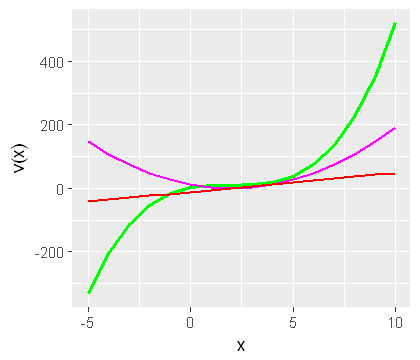

In [8]:
## Define the function
v = function(x) x^3 - 6 * x^2 + 12 * x + 2

df7 = data.frame(x = seq(-5,10))
df7$v = v(df7$x)

## Function to compute derivative
vd = function(x) 3 * x^2 - 12 * x + 12

df7$first_der = vd(df7$x)

## Function to compute second derivative
vd2 = function(x) 6 * x - 12

df7$sec_der = vd2(df7$x)

ggplot() +
    geom_line(data = df7, aes(x,v), color = 'green', size = 1) +
    geom_line(data = df7, aes(x,first_der), color = 'magenta', size = 0.8) +
    geom_line(data = df7, aes(x,sec_der), color = 'red', size = 0.8) +
    ylab('v(x)') + 
    xlab('x')

cat(paste("v(2)   =", v(2), '\n'))
cat(paste("v'(2)  = ", vd(2), '\n'))
cat(paste("v''(2) = ", vd2(2)))

## Optimization
The ability to use derivatives to find minima and maxima of a function makes it a useful tool for scenarios where you need to optimize a function for a specific variable.

### Defining Functions to be Optimized
For example, suppose you have decided to build an online video service that is based on a subscription model. You plan to charge a monthly subscription fee, and you want to make the most revenue possible. The problem is that customers are price-sensitive, so if you set the monthly fee too high, you'll deter some customers from signing up. Conversely, if you set the fee too low, you may get more customers, but at the cost of reduced revenue.

What you need is some kind of function that will tell you how many subscriptions you might expect to get based on a given fee. So you've done some research, and found a formula to indicate that the expected subscription volume (in thousands) can be calculated as 5-times the monthly fee subtracted from 100; or expressed as a function:

\begin{equation}s(x) = -5x + 100\end{equation}

What you actually want to optimize is monthly revenue, which is simply the number of subscribers multiplied by the fee:

\begin{equation}r(x) = s(x) \cdot x\end{equation}

We can combine ***s(x)*** into ***r(x)*** like this:

\begin{equation}r(x) = -5x^{2} + 100x\end{equation}

### Finding the Prime Derivative
The function ***r(x)*** will return the expected monthly revenue (in thousands) for any proposed fee (*x*). What we need to do now is to find the fee that yields the maximum revenue. Fortunately, we can use a derivative to do that.

First, we need to determine the prime derivative of ***r(x)***, and we can do that easily using the power rule:

\begin{equation}r'(x) = 2 \cdot -5x + 100\end{equation}

Which is:

\begin{equation}r'(x) = -10x + 100\end{equation}

### Find Critical Points
Now we need to find any critical points where the derivative is 0, as this could indicate a maximum:

\begin{equation}-10x + 100 = 0\end{equation}

Let's isolate the *x* term:

\begin{equation}-10x = -100\end{equation}

Both sides are negative, so we can mulitply both by -1 to make them positive without affecting the equation:

\begin{equation}10x = 100\end{equation}

Now we can divide both sides by 10 to isolate *x*:

\begin{equation}x = \frac{100}{10}\end{equation}

So:

\begin{equation}x = 10\end{equation}

#### Check for a Maximum
We now know that with an *x* value of of **10**, the derivative is 0; or put another way, when the fee is 10, the slope indicating the change in subscription volume is flat. This could potentially be a point where the change in subscription volume has peaked (in other words, a maximum); but it could also be a minimum or just an inflexion point where the rate of change transitions from negative to positive.

To be sure, we can check the second order derivative. We can calculate this by applying the power rule to the prime derivative:

\begin{equation}r''(x) = -10\end{equation}

Note that the second derivative is a constant with a negative value. It will be the same for any point, including our critical point at *x=10*:

\begin{equation}r''(10) = -10\end{equation}

A negative value for the second derivative tells us that the derivative slope is moving in a negative direction at the point where it is 0, so the function value must be at a maximum.

In other words, the optimal monthly fee for our online video service is 10 - this will generate the maximum monthly revenue.

Run the code below to show the function ***r(x)*** as a graph, and verify that the maximum point is at x = 10.

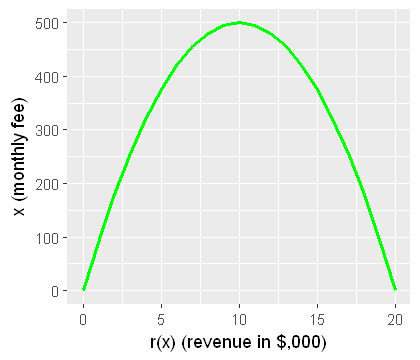

In [9]:
s = function(x) -5 * x + 100
r = function(x) s(x) * x

df8 = data.frame(x = seq(0,20))
df8$r = r(df8$x)

ggplot(df8, aes(x,r)) +
    geom_line(color = 'green', size = 1) +
    ylab('x (monthly fee)') + 
    xlab('r(x) (revenue in $,000)')